In [1]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler #undersampling
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import classification_report # precision, recall, f1

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['ggplot'])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from sklearn.model_selection import GridSearchCV 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the data from the .npz files.

In [8]:
# Bag of words model data

bow = np.load('/content/drive/My Drive/Colab Notebooks/Capstone_project/bow_data.npz')

bow = bow['arr_0']

In [15]:
# Tf_Idf model data

tf_idf = np.load('/content/drive/My Drive/Colab Notebooks/Capstone_project/tf_idf_data.npz')

tf_idf = tf_idf['arr_0']

In [4]:
# Target data 

target = np.load('/content/drive/My Drive/Colab Notebooks/Capstone_project/target_data.npz')

target = target['arr_0']

## Make the data balanced

In [5]:
# Undersampling object
rus = RandomUnderSampler(sampling_strategy={1:26000,2:26000,3:26000,4:26000,5:26000},random_state=0)
def under_sample(x,y):
    
    X_resampled, y_resampled = rus.fit_resample(x,y)
    return X_resampled, y_resampled

In [12]:
# training data
X_train, y_train = under_sample(bow[0:1189697,], target[0:1189697])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
# Testing data

X_test, y_test = bow[1189697:,] , target[1189697:]

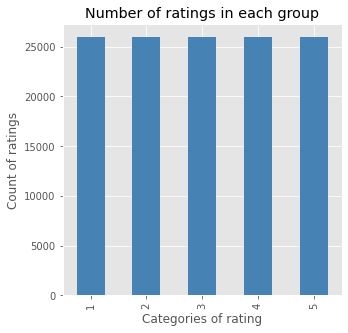

In [17]:
# Distribution of the data after undersampling.

dis = pd.value_counts(y_train, sort=False)
dis.plot(kind='bar', figsize=(5, 5), color='steelblue')
plt.title('Number of ratings in each group')
plt.ylabel('Count of ratings')
plt.xlabel('Categories of rating')

plt.show()

# MODEL 1 : Naive Bayes model with multiple classes.

Bag of words data.

In [71]:
# Naive Bayes 

clf = MultinomialNB()

In [72]:
# Training the model on the udersampled data.

clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
# Prediction on the 
pred = clf.predict(X_test)

In [74]:
# Confusion Matrix
print(confusion_matrix(y_test, pred))

[[ 289   70   31   26   61]
 [  48   35   29   10   27]
 [  29   41   45   41   63]
 [  43   38   65  146  214]
 [ 191  196  184  579 2499]]


In [75]:
# Precision, Recall, F1-score 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.48      0.61      0.54       477
           2       0.09      0.23      0.13       149
           3       0.13      0.21      0.16       219
           4       0.18      0.29      0.22       506
           5       0.87      0.68      0.77      3649

    accuracy                           0.60      5000
   macro avg       0.35      0.40      0.36      5000
weighted avg       0.71      0.60      0.64      5000



# Model 2: Using BI-grams

load bi-gram data of Bag of waords

In [7]:
# Bag of words model data

bi_grm_bow = np.load('/content/drive/My Drive/Colab Notebooks/Capstone_project/bi_grm_bow_data.npz')

bi_grm_bow = bi_grm_bow['arr_0']

In [8]:
# training data
X_train, y_train = under_sample(bi_grm_bow[0:1189697,], target[0:1189697])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# Testing data

X_test, y_test = bi_grm_bow[1189697:,] , target[1189697:]

In [12]:
# Naive Bayes 

clf = MultinomialNB()

# Training the model on the udersampled data.

clf.fit(X_train, y_train)

# Prediction on the 
pred = clf.predict(X_test)

In [13]:
# Confusion Matrix
print(confusion_matrix(y_test, pred))

# Precision, Recall, F1-score 
print(classification_report(y_test, pred))

[[ 297   62   35   25   58]
 [  50   37   26   13   23]
 [  30   39   48   41   61]
 [  45   43   69  148  201]
 [ 204  217  195  588 2445]]
              precision    recall  f1-score   support

           1       0.47      0.62      0.54       477
           2       0.09      0.25      0.14       149
           3       0.13      0.22      0.16       219
           4       0.18      0.29      0.22       506
           5       0.88      0.67      0.76      3649

    accuracy                           0.59      5000
   macro avg       0.35      0.41      0.36      5000
weighted avg       0.71      0.59      0.64      5000



In [14]:
params = {
    'alpha':[1,2,5,10,30,50,60,100,200,500]
}

In [15]:
nb = MultinomialNB()

nb_cv = GridSearchCV(nb, params, cv = 5) 
  
nb_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(nb_cv.best_params_)) 
print("Best score is {}".format(nb_cv.best_score_)) 

Tuned Decision Tree Parameters: {'alpha': 30}
Best score is 0.42049230769230767


# Different values for alpha does not increase the accuracy. 

# Model 3: Using Tf_idf data

In [16]:
# training data
X_train, y_train = under_sample(tf_idf[0:1189697,], target[0:1189697])

# Testing data

X_test, y_test = tf_idf[1189697:,] , target[1189697:]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
# Naive Bayes 

clf = MultinomialNB()

# Training the model on the udersampled data.

clf.fit(X_train, y_train)

# Prediction on the 
pred = clf.predict(X_test)

In [18]:
# Confusion Matrix
print(confusion_matrix(y_test, pred))

# Precision, Recall, F1-score 
print(classification_report(y_test, pred))

[[ 314   55   35   21   52]
 [  55   35   27   11   21]
 [  36   48   49   34   52]
 [  54   41   88  133  190]
 [ 251  226  251  629 2292]]
              precision    recall  f1-score   support

           1       0.44      0.66      0.53       477
           2       0.09      0.23      0.13       149
           3       0.11      0.22      0.15       219
           4       0.16      0.26      0.20       506
           5       0.88      0.63      0.73      3649

    accuracy                           0.56      5000
   macro avg       0.34      0.40      0.35      5000
weighted avg       0.71      0.56      0.62      5000



# Model 4: Bi-grams Tf_idf

In [6]:
bi_grm_tf_idf = np.load('/content/drive/My Drive/Colab Notebooks/Capstone_project/bi_grm_tf_idf_data.npz')

bi_grm_tf_idf = bi_grm_tf_idf['arr_0']

In [7]:
# training data
X_train, y_train = under_sample(bi_grm_tf_idf[0:1189697,], target[0:1189697])

# Testing data

X_test, y_test = bi_grm_tf_idf[1189697:,] , target[1189697:]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
# Naive Bayes 

clf = MultinomialNB()

# Training the model on the udersampled data.

clf.fit(X_train, y_train)

# Prediction on the 
pred = clf.predict(X_test)

In [17]:
# Confusion Matrix
print(confusion_matrix(y_test, pred))

# Precision, Recall, F1-score 
print(classification_report(y_test, pred))

[[ 320   55   29   18   55]
 [  56   33   24   13   23]
 [  38   40   50   37   54]
 [  51   45   89  136  185]
 [ 258  239  263  644 2245]]
              precision    recall  f1-score   support

           1       0.44      0.67      0.53       477
           2       0.08      0.22      0.12       149
           3       0.11      0.23      0.15       219
           4       0.16      0.27      0.20       506
           5       0.88      0.62      0.72      3649

    accuracy                           0.56      5000
   macro avg       0.33      0.40      0.34      5000
weighted avg       0.71      0.56      0.61      5000



In [10]:
params = {
    'alpha':[1,2,5,10,30,50,60,100,200,500]
}

In [11]:
nb = MultinomialNB()

nb_cv = GridSearchCV(nb, params, cv = 5) 
  
nb_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(nb_cv.best_params_)) 
print("Best score is {}".format(nb_cv.best_score_)) 

Tuned Decision Tree Parameters: {'alpha': 2}
Best score is 0.4150153846153846


# Created model with alpha=2 no change in accuracy

## In the above model 1 we created features using bag of words. Using CountVectorization that takes words as feature based on the frequencies.

## In model 2 we created features using Bi-gram bag of words.

## In model 3 we used TF-IDF method to create the word vectors. Based on TF-IDF we will built Naive Bayes model to test the model's performance.

## In model 4 we used Bi-gram features using Tf-Idf.

# Accuracy

## Model 1 : 60%

## Model 2 : 59%

## MOdel 3 & Model 4 : 56 %